In [1]:
#importamos librerias
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#se carga el dataset
df = pd.read_csv('games.csv')

In [3]:
df.drop(['title','date_release','rating','steam_deck'],axis=1,inplace=True)

In [4]:
# Análisis de correlación
corr = df.corr()
corr.style.background_gradient()

,app_id,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount
app_id,1.000000,-0.023732,-0.177454,-0.151239,0.155888,-0.036499,-0.020939,-0.012846,0.014311
win,-0.023732,1.000000,0.073223,0.057304,-0.103214,0.005394,0.034773,0.037978,0.016984
mac,-0.177454,0.073223,1.000000,0.631572,0.074308,0.019241,-0.005611,-0.011133,-0.036486
linux,-0.151239,0.057304,0.631572,1.000000,0.069807,0.020728,-0.007876,-0.010080,-0.019996
positive_ratio,0.155888,-0.103214,0.074308,0.069807,1.000000,0.022174,-0.002469,0.001412,-0.005655
user_reviews,-0.036499,0.005394,0.019241,0.020728,0.022174,1.000000,0.033216,0.029512,-0.004406
price_final,-0.020939,0.034773,-0.005611,-0.007876,-0.002469,0.033216,1.000000,0.963527,-0.132361
price_original,-0.012846,0.037978,-0.011133,-0.010080,0.001412,0.029512,0.963527,1.000000,0.042259
discount,0.014311,0.016984,-0.036486,-0.019996,-0.005655,-0.004406,-0.132361,0.042259,1.000000


In [5]:
# Inicializamos el Modelo
ridge = linear_model.Ridge()

In [6]:
# Preparamos la data
data_x = df.drop(['app_id','win','mac','linux','positive_ratio','user_reviews','price_final','discount'], axis=1)
data_y = df.price_final

In [7]:
#Aqui hacemos el split de los datos
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [8]:
# Entrenamos el modelo
ridge.fit(train_x, train_y)

Ridge()

In [9]:
print(f'y = {round( ridge.coef_[0], 2)}x + {round(ridge.intercept_, 2)}')

y = 0.94x + 0.01


In [10]:
# Veamos la calificación
print(f'Score: {round(ridge.score(test_x, test_y), 4) * 100}%')

Score: 90.35%


In [11]:
# En base a las marcas de las computadoras y al ratio, esto es lo que se gastan las personas
priceOriginal= 5
predicted = ridge.predict([[priceOriginal]])#aqui van todas las tablas de data_x

C:\Users\eroni\OneDrive\Documentos\entornoVirtua1\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [12]:
print(f'El precio original es de {priceOriginal} y el precio que se pagará es de {round(predicted[0], 2)}')

El precio original es de 5 y el precio que se pagará es de 4.72


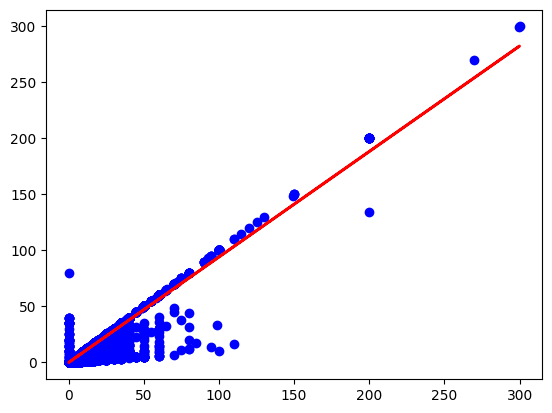

In [13]:
#Visualiza los datos y la línea de regresión ajustada
plt.scatter(train_x, train_y, color='blue')
plt.plot(train_x, ridge.predict(train_x), color='red', linewidth=2)
plt.show()